In [150]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [151]:
pwd = os.getcwd()
path2dat = pwd + '/'
datalst = os.listdir(path2dat+'data_reps/data_rep_000/')

In [152]:
TMDPDF_VS_KT_LOWQ2 = "fort.101"
TMDPDF_VS_KT_HIGHQ2 = "fort.102"

In [155]:
TMDFF_VS_PT_LOWQ2 = "fort.201"
TMDFF_VS_PT_HIGHQ2 = "fort.202"

In [156]:
TMDdatalst = [TMDPDF_VS_KT_LOWQ2, TMDPDF_VS_KT_HIGHQ2, TMDFF_VS_PT_LOWQ2, TMDFF_VS_PT_HIGHQ2]

In [157]:
up = "up"
u1 = "uHe"
u2 = "uXe"

In [158]:
maxlib = {}
barlib = {}
minlib = {}
for _fp in TMDdatalst:
    print(_fp)
    maxlib[_fp] = {}
    minlib[_fp] = {}
    barlib[_fp] = {}
    maxlib[_fp][up] = []
    minlib[_fp][up] = []
    barlib[_fp][up] = []
    maxlib[_fp][u1] = []
    minlib[_fp][u1] = []
    barlib[_fp][u1] = []
    maxlib[_fp][u2] = []
    minlib[_fp][u2] = []
    barlib[_fp][u2] = []
    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/'+_fp, delimiter = ',',delim_whitespace=True))):
        for rep in range(101):
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/'+_fp
                df1 = pd.read_csv(fp1, delimiter = ',',delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        # u quark from proton
        sortedlst = sorted(df['up'].tolist())
        downcutoff = int(len(sortedlst)/200.*31)
        upcutoff = int(len(sortedlst)/200.*168)
        maxlib[_fp][up].append(sortedlst[upcutoff])
        minlib[_fp][up].append(sortedlst[downcutoff])
        barlib[_fp][up].append(df['up'].iloc[0])
        # u quark from light nucleus (He)
        sortedlst = sorted(df['u1'].tolist())
        downcutoff = int(len(sortedlst)/200.*31)
        upcutoff = int(len(sortedlst)/200.*168)
        maxlib[_fp][u1].append(sortedlst[upcutoff])
        minlib[_fp][u1].append(sortedlst[downcutoff])
        barlib[_fp][u1].append(df['u1'].iloc[0])
        # u quark from heavy nucleus (Xe)
        sortedlst = sorted(df['u2'].tolist())
        downcutoff = int(len(sortedlst)/200.*31)
        upcutoff = int(len(sortedlst)/200.*168)
        maxlib[_fp][u2].append(sortedlst[upcutoff])
        minlib[_fp][u2].append(sortedlst[downcutoff])
        barlib[_fp][u2].append(df['u2'].iloc[0])

fort.101
fort.102
fort.201
fort.202


In [159]:
print('Done!')

Done!


In [169]:
def plot_68percent(axes,filename,xaxis,nucleus,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    maxx = maxlib[filename][nucleus]
    minn = minlib[filename][nucleus]
    xdata = file[xaxis]
    xmin = np.min(xdata)
    xmax = np.max(xdata)
    yUP = interp1d(xdata, maxx, kind='linear')
    yLO = interp1d(xdata, minn, kind='linear')
    axes.fill_between(xdata,maxx,minn,color = clr,alpha=0.4)

In [170]:
def plot_68percent_ratio(axes,filename,xaxis,nucleus,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    maxx = maxlib[filename][nucleus]
    minn = minlib[filename][nucleus]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    xdata = file[xaxis]
    end = len(xdata)
    
    xxdata = xdata[1:end]
    
    ratio_max = []
    ratio_min = []
    for i in range(len(xxdata)):
        ratio_max.append(maxx[i+1]/maxx_proton[i+1])
        ratio_min.append(minn[i+1]/minn_proton[i+1])
    xmin = np.min(xxdata)
    xmax = np.max(xxdata)
    yUP = interp1d(xxdata, ratio_max, kind='linear')
    yLO = interp1d(xxdata, ratio_min, kind='linear')
    axes.fill_between(xxdata,ratio_max,ratio_min,color = clr,alpha=0.4)

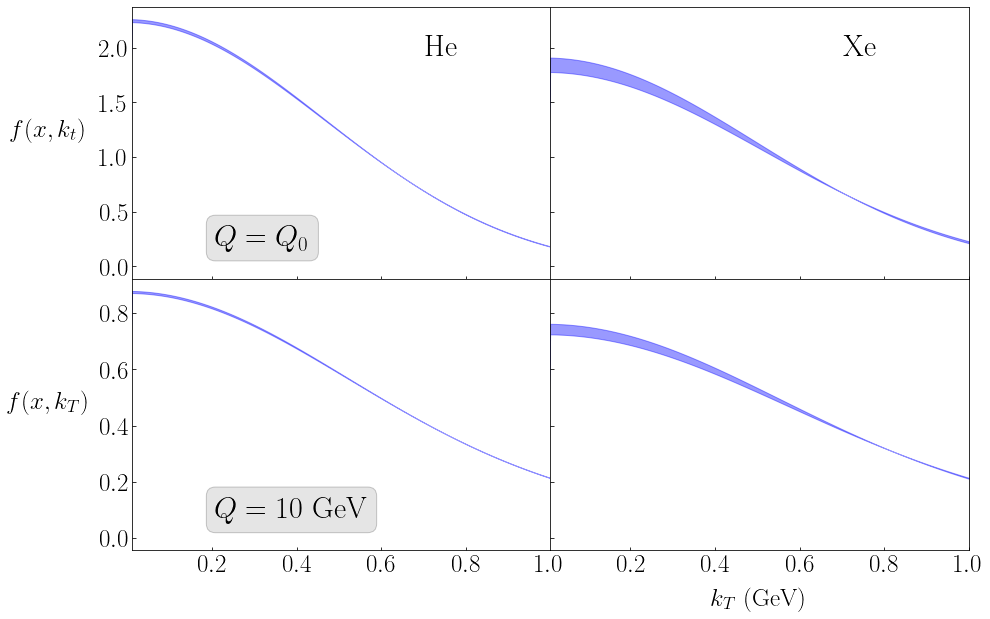

In [171]:
fig1, axs1 = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})


plot_68percent(axs1[0,0],TMDPDF_VS_KT_LOWQ2,"kt",u1,"blue")
plot_68percent(axs1[0,1],TMDPDF_VS_KT_LOWQ2,"kt",u2,"blue")

plot_68percent(axs1[1,0],TMDPDF_VS_KT_HIGHQ2,"kt",u1,"blue")
plot_68percent(axs1[1,1],TMDPDF_VS_KT_HIGHQ2,"kt",u2,"blue")

# Plot Labels
axs1[0,0].set_ylabel(r"\rm $f(x,k_t)$", fontsize = 25,rotation = 0,labelpad = 50)
axs1[0,1].set_xlabel(r"\rm $k_t$ (GeV)", fontsize = 25, labelpad = 10)

axs1[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs1[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs1[0,0].set_xlim(0.01,1)
axs1[0,1].set_xlim(0.01,1)

# Plot Labels

axs1[1,0].set_ylabel(r"\rm $f(x,k_T)$", fontsize = 25,rotation = 0,labelpad = 50)
axs1[1,1].set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 25, labelpad = 10)

axs1[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs1[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs1[1,0].set_xlim(0.01,1)
axs1[1,1].set_xlim(0.01,1)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)
props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs1[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs1[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs1[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs1[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs1[0,0].text(0.7, 0.9,  r"\rm He", transform=axs1[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs1[0,1].text(0.7, 0.9,  r"\rm Xe", transform=axs1[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

#axs1[0,2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig1.set_size_inches(15,10)

In [172]:
fig1.savefig('nTMPDFs.pdf', bbox_inches = "tight")

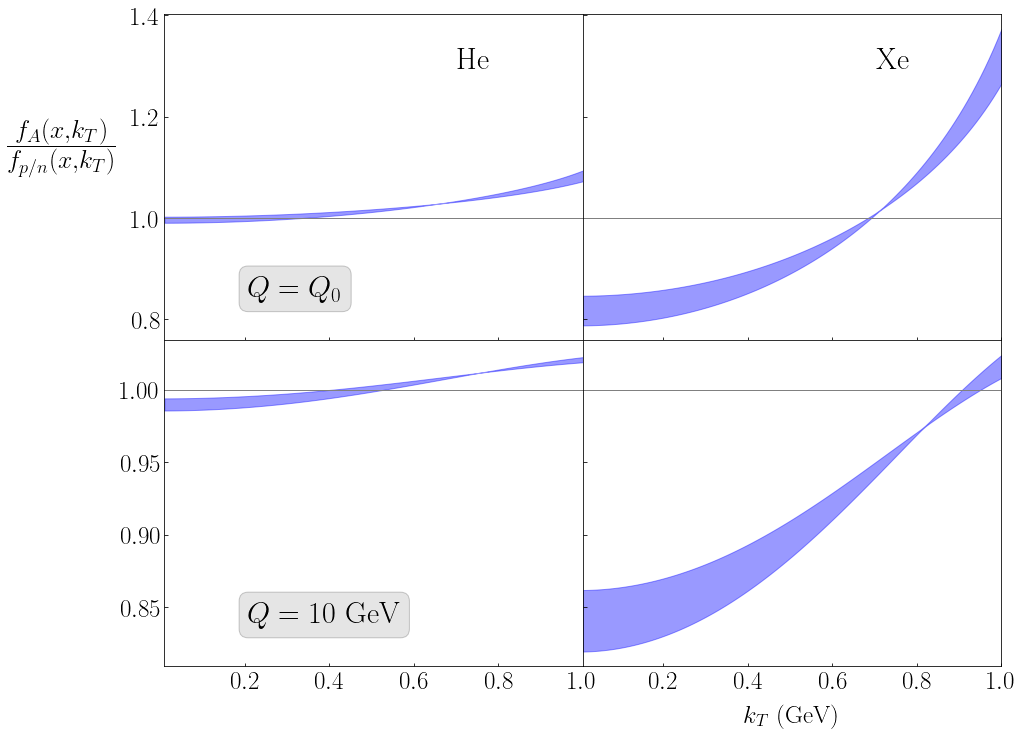

In [173]:
fig2, axs2 = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

plot_68percent_ratio(axs2[0,0],TMDPDF_VS_KT_LOWQ2,"kt",u1,"blue")
plot_68percent_ratio(axs2[0,1],TMDPDF_VS_KT_LOWQ2,"kt",u2,"blue")

plot_68percent_ratio(axs2[1,0],TMDPDF_VS_KT_HIGHQ2,"kt",u1,"blue")
plot_68percent_ratio(axs2[1,1],TMDPDF_VS_KT_HIGHQ2,"kt",u2,"blue")

    
axs2[0,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs2[0,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)

axs2[1,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs2[1,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)



# Plot Labels
axs2[0,1].set_xlabel(r"\rm $k_t$ (GeV)", fontsize = 25, labelpad = 10)

axs2[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs2[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs2[0,0].set_xlim(0.01,1)
axs2[0,1].set_xlim(0.01,1)


# Plot Labels

axs2[0,0].set_ylabel(r"\rm $\frac{f_A(x,k_T)}{f_{p/n}(x,k_T)}$", fontsize = 37,rotation = 0,labelpad = 70)
axs2[1,1].set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 25, labelpad = 10)

axs2[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs2[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs2[1,0].set_xlim(0.01,1)
axs2[1,1].set_xlim(0.01,1)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)
props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs2[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs2[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs2[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs2[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)


axs2[0,0].text(0.7, 0.9,  r"\rm He", transform=axs2[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs2[0,1].text(0.7, 0.9,  r"\rm Xe", transform=axs2[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

#axs2[0,1].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig2.set_size_inches(15,12)


In [149]:
fig2.savefig('nTMPDF_Ratios.pdf', bbox_inches = "tight")

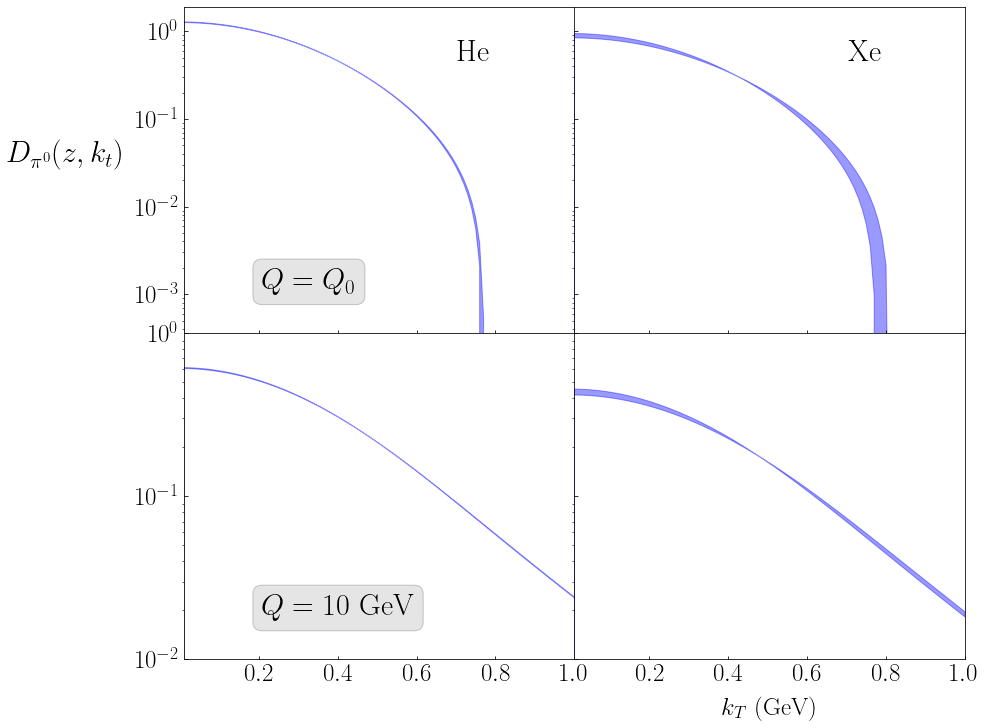

In [187]:
fig3, axs3 = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

plot_68percent(axs3[0,0],TMDFF_VS_PT_LOWQ2,"pt",u1,"blue")
plot_68percent(axs3[0,1],TMDFF_VS_PT_LOWQ2,"pt",u2,"blue")

plot_68percent(axs3[1,0],TMDFF_VS_PT_HIGHQ2,"pt",u1,"blue")
plot_68percent(axs3[1,1],TMDFF_VS_PT_HIGHQ2,"pt",u2,"blue")


# Plot Labels
axs3[0,0].set_ylabel(r"\rm $D_{\pi^0}(z,k_t)$", fontsize = 30,rotation = 0,labelpad = 70)
axs3[0,1].set_xlabel(r"\rm $k_t$ (GeV)", fontsize = 25, labelpad = 10)

axs3[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs3[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs3[0,0].set_xlim(0.01,1)
axs3[0,1].set_xlim(0.01,1)


# Plot Labels
axs3[1,1].set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 25, labelpad = 10)
axs3[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs3[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs3[1,0].set_xlim(0.01,1)
axs3[1,1].set_xlim(0.01,1)

axs3[0,0].set_yscale("log")
axs3[1,0].set_yscale("log")
axs3[1,0].set_ylim(10**(-2),10**(0))


# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)

props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs3[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs3[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs3[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs3[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)



axs3[0,0].text(0.7, 0.9,  r"\rm He", transform=axs3[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs3[0,1].text(0.7, 0.9,  r"\rm Xe", transform=axs3[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

#axs3[0,2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig3.set_size_inches(14,12)


In [188]:
fig3.savefig('nTMDFFs.pdf', bbox_inches = "tight")

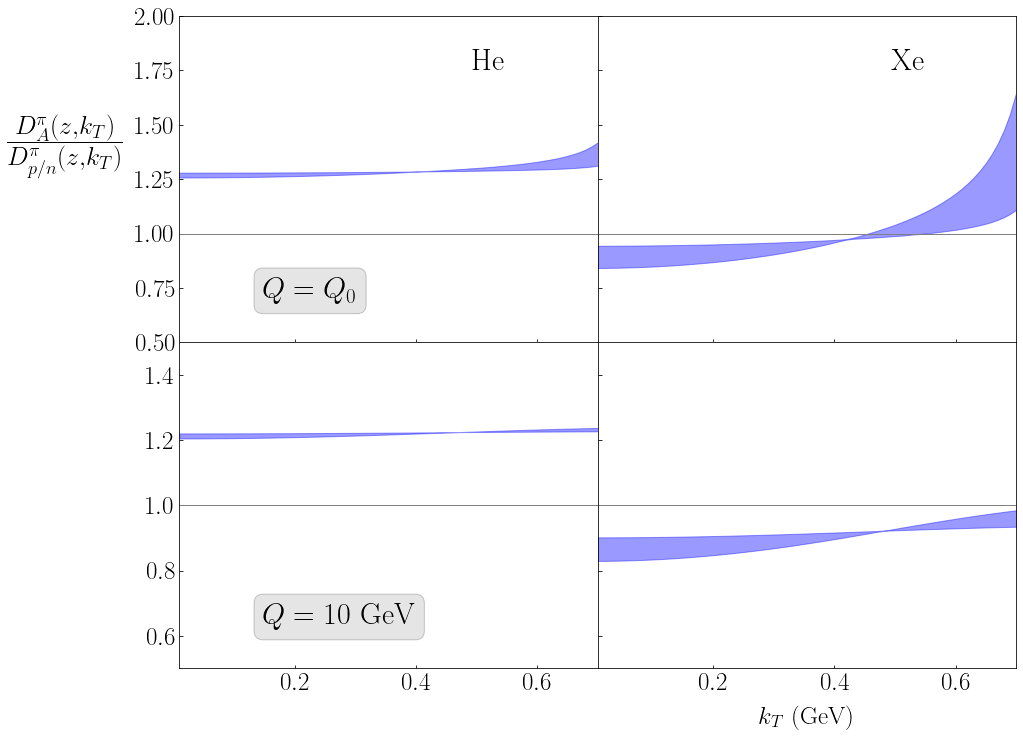

In [192]:
fig4, axs4 = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})


plot_68percent_ratio(axs4[0,0],TMDFF_VS_PT_LOWQ2,"pt",u1,"blue")
plot_68percent_ratio(axs4[0,1],TMDFF_VS_PT_LOWQ2,"pt",u2,"blue")

plot_68percent_ratio(axs4[1,0],TMDFF_VS_PT_HIGHQ2,"pt",u1,"blue")
plot_68percent_ratio(axs4[1,1],TMDFF_VS_PT_HIGHQ2,"pt",u2,"blue")


axs4[0,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs4[0,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)

axs4[1,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs4[1,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)

# Plot Labels
axs4[0,1].set_xlabel(r"\rm $k_t$ (GeV)", fontsize = 25, labelpad = 10)
axs4[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs4[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs4[0,0].set_xlim(0.01,1)
axs4[0,1].set_xlim(0.01,1)
axs4[0,0].set_ylim(0.5,2)
axs4[1,0].set_ylim(0.5,1.5)


# Plot Labels
axs4[0,0].set_ylabel(r"\rm $\frac{D^{\pi}_{A}(z,k_T)}{D^{\pi}_{p/n}(z,k_T)}$", fontsize = 37,rotation = 0,labelpad = 70)
axs4[1,1].set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 25, labelpad = 10)

axs4[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs4[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs4[1,0].set_xlim(0.01,0.7)
axs4[1,1].set_xlim(0.01,0.7)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)
props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs4[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs4[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs4[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs4[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)


axs4[0,0].text(0.7, 0.9,  r"\rm He", transform=axs4[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs4[0,1].text(0.7, 0.9,  r"\rm Xe", transform=axs4[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

#axs4[0,1].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig4.set_size_inches(15,12)


In [194]:
fig4.savefig('nTMDFF_Ratios.pdf', bbox_inches = "tight")

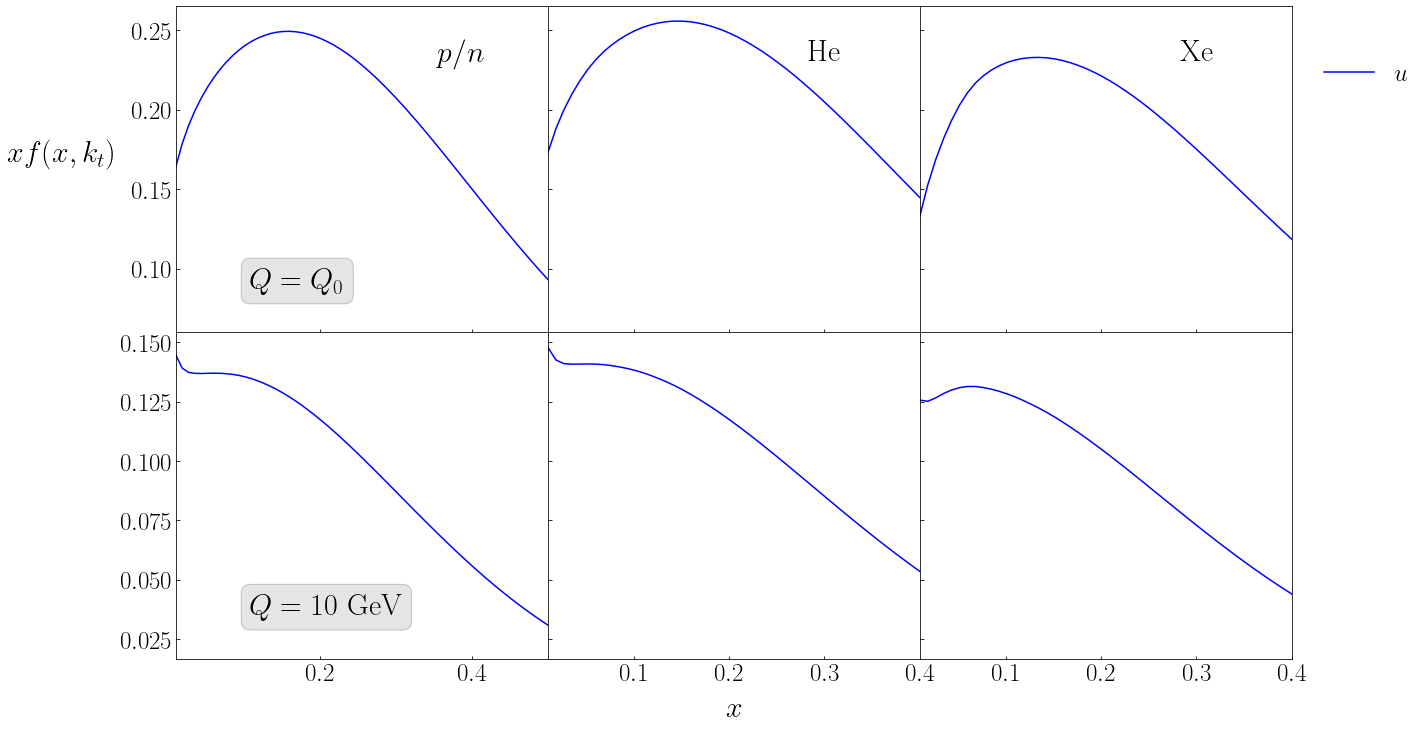

In [62]:
fig5, axs5 = plt.subplots(2, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})


interpolate_axes(axs5[0,0], df5['xb'], df5['xb']*df5['up'], 'blue', False,"" )
interpolate_axes(axs5[0,1], df5['xb'], df5['xb']*df5['u1'], 'blue', False,"" )
interpolate_axes(axs5[0,2], df5['xb'], df5['xb']*df5['u2'], 'blue', True,r"\rm $u$")


# Plot Labels
axs5[0,0].set_ylabel(r"\rm $xf(x,k_t)$", fontsize = 30,rotation = 0,labelpad = 70)
axs5[0,1].set_xlabel(r"\rm $x_b$ ", fontsize = 25, labelpad = 10)

axs5[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs5[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs5[0,2].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs5[0,0].set_xlim(0.01,1)
axs5[0,1].set_xlim(0.01,1)
axs5[0,2].set_xlim(0.01,1)

interpolate_axes(axs5[1,0], df6['xb'], df6['xb']*df6['up'], 'blue', False,"" )
interpolate_axes(axs5[1,1], df6['xb'], df6['xb']*df6['u1'], 'blue', False,"" )
interpolate_axes(axs5[1,2], df6['xb'], df6['xb']*df6['u2'], 'blue', True,r"\rm $u$")

# Plot Labels

axs5[1,1].set_xlabel(r"\rm $x$", fontsize = 30, labelpad = 10)

axs5[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs5[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs5[1,2].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs5[1,0].set_xlim(0.01,0.5)
axs5[1,1].set_xlim(0.01,0.4)
axs5[1,2].set_xlim(0.01,0.4)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)

props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs5[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs5[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs5[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs5[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)


axs5[0,0].text(0.7, 0.9,  r"\rm $p/n$", transform=axs5[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs5[0,1].text(0.7, 0.9,  r"\rm He", transform=axs5[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs5[0,2].text(0.7, 0.9,  r"\rm Xe", transform=axs5[0,2].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs5[0,2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig5.set_size_inches(20,12)


In [63]:
fig5.savefig('nTMPDFs_xdep.pdf', bbox_inches = "tight")

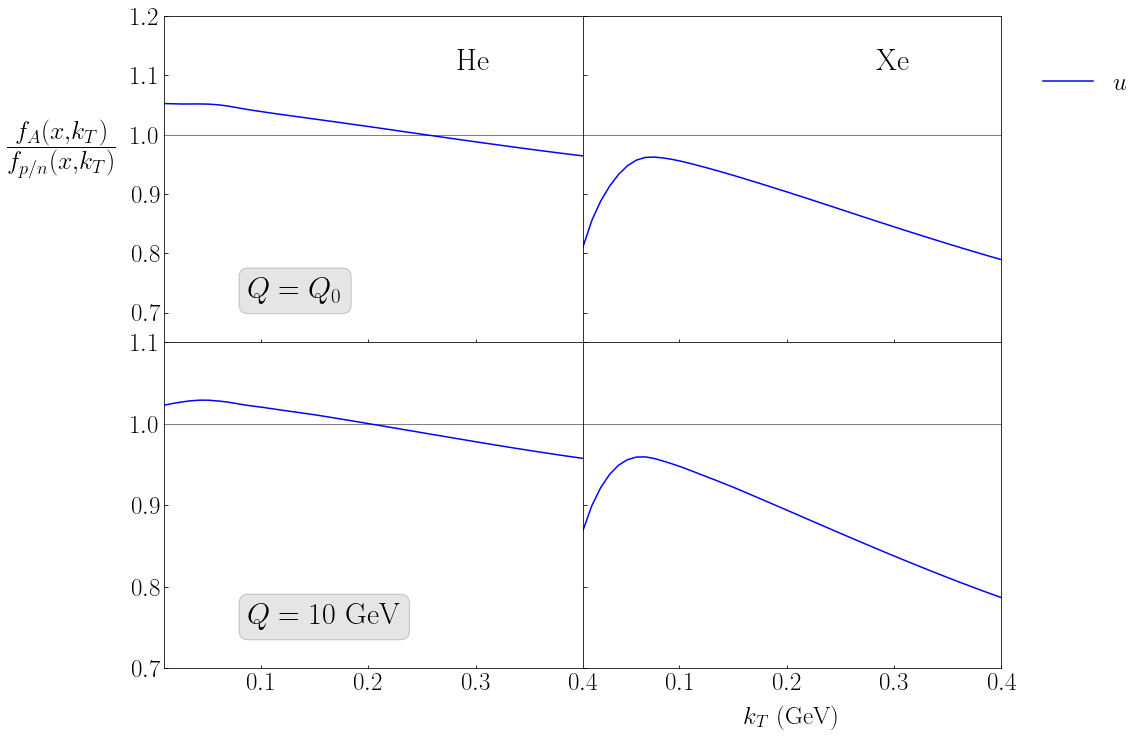

In [64]:
fig6, axs6 = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})


axs6[0,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs6[0,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)

axs6[1,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs6[1,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)


interpolate_axes(axs6[0,0], df5['xb'], (df5['u1']/df5['up']), 'blue', False,"" )
interpolate_axes(axs6[0,1], df5['xb'], (df5['u2']/df5['up']), 'blue', True,r"\rm $u$" )


# Plot Labels
axs6[0,1].set_xlabel(r"\rm $x$", fontsize = 25, labelpad = 10)
axs6[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs6[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)



interpolate_axes(axs6[1,0], df6['xb'], (df6['u1']/df6['up']), 'blue', False,"" )
interpolate_axes(axs6[1,1], df6['xb'], (df6['u2']/df6['up']), 'blue', True,r"\rm $u$" )

# Plot Labels

axs6[0,0].set_ylabel(r"\rm $\frac{f_A(x,k_T)}{f_{p/n}(x,k_T)}$", fontsize = 37,rotation = 0,labelpad = 70)
axs6[1,1].set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 25, labelpad = 10)

axs6[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs6[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs6[1,0].set_xlim(0.01,0.4)
axs6[1,1].set_xlim(0.01,0.4)

# Plot Limits
axs6[0,0].set_ylim(0.65,1.2)
axs6[1,1].set_ylim(0.7,1.1)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)
props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs6[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs6[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs6[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs6[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)


axs6[0,0].text(0.7, 0.9,  r"\rm He", transform=axs6[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs6[0,1].text(0.7, 0.9,  r"\rm Xe", transform=axs6[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs6[0,1].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig6.set_size_inches(15,12)


In [65]:
fig6.savefig('nTMPDFRatios_xdep.pdf', bbox_inches = "tight")

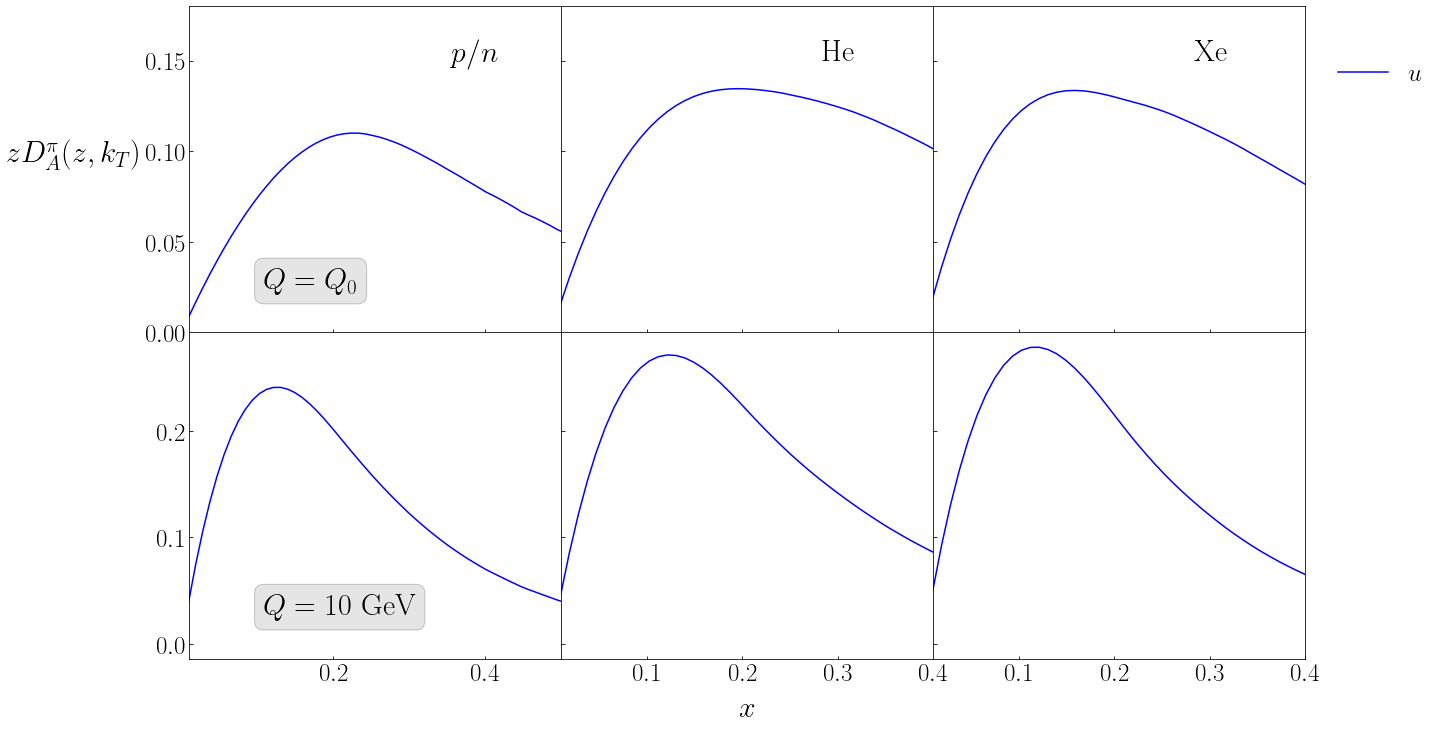

In [66]:
fig7, axs7 = plt.subplots(2, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})


interpolate_axes2(axs7[0,0], df7['Z'], df7['Z']*df7['up'], 'blue', False,"" )
interpolate_axes2(axs7[0,1], df7['Z'], df7['Z']*df7['u1'], 'blue', False,"" )
interpolate_axes2(axs7[0,2], df7['Z'], df7['Z']*df7['u2'], 'blue', True,r"\rm $u$")

# Plot Labels
axs7[0,0].set_ylabel(r"\rm $zD^{\pi}_{A}(z,k_T)$", fontsize = 30,rotation = 0,labelpad = 70)
axs7[0,1].set_xlabel(r"\rm $z$ ", fontsize = 25, labelpad = 10)

axs7[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs7[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs7[0,2].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs7[0,0].set_xlim(0.01,1)
axs7[0,1].set_xlim(0.01,1)
axs7[0,2].set_xlim(0.01,1)


interpolate_axes2(axs7[1,0], df8['Z'], df8['Z']*df8['up'], 'blue', False,"" )
interpolate_axes2(axs7[1,1], df8['Z'], df8['Z']*df8['u1'], 'blue', False,"" )
interpolate_axes2(axs7[1,2], df8['Z'], df8['Z']*df8['u2'], 'blue', True,r"\rm $u$")

# Plot Labels

axs7[1,1].set_xlabel(r"\rm $x$", fontsize = 30, labelpad = 10)

axs7[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs7[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs7[1,2].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs7[0,0].set_ylim(0,0.18)
axs7[1,0].set_xlim(0.01,0.5)
axs7[1,1].set_xlim(0.01,0.4)
axs7[1,2].set_xlim(0.01,0.4)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)

props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs7[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs7[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs7[1,0].text(0.2, 0.2,  r"\rm $Q = 10$ GeV", transform=axs7[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)


axs7[0,0].text(0.7, 0.9,  r"\rm $p/n$", transform=axs7[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs7[0,1].text(0.7, 0.9,  r"\rm He", transform=axs7[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs7[0,2].text(0.7, 0.9,  r"\rm Xe", transform=axs7[0,2].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs7[0,2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig7.set_size_inches(20,12)

In [67]:
fig7.savefig('nTMDFF_zdep.pdf', bbox_inches = "tight")